### ARX MIMO Example
Case: 3 outputs x 4 inputs

Author: Giuseppe Armenise, revised by RBdC

In [1]:
# Checking path to access other files
import numpy as np
from utils import plot_comparison

from sippy_unipi import system_identification
from sippy_unipi.datasets import load_sample_mimo
from sippy_unipi.model import IO_MIMO_Model, IO_SISO_Model

In [2]:
seed = 0
np.random.seed(0)

In [3]:
na = [3, 1, 2]
nb = [[2, 1, 3, 2], [3, 2, 1, 1], [1, 2, 1, 2]]
th = [[1, 2, 2, 1], [1, 2, 0, 0], [0, 1, 0, 2]]

n_samples = 401
ts = 1.0
time, Ysim, Usim, g_sys, Yerr, Uerr, h_sys, Ytot, Utot = load_sample_mimo(
    n_samples, ts, seed=seed
)

/opt/pysetup/.venv/lib/python3.12/site-packages/control/timeresp.py:1083: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


### Identification Parameters

In [4]:
ordersna = na
ordersnb = nb
theta_list = th

### Identification Stage

In [5]:
# ARX
Id_ARX = system_identification(
    Ytot,
    Usim,
    "ARX",
    *(ordersna, ordersnb, theta_list),
    id_mode="LLS",
)

# FIR
Id_FIR = system_identification(
    Ytot, Usim, "FIR", *([0, 0, 0], ordersnb, theta_list), id_mode="LLS"
)

### Output of the Identified Model

In [6]:
if not isinstance(Id_ARX, IO_SISO_Model | IO_MIMO_Model):
    raise RuntimeError("Model not identified")
if not isinstance(Id_FIR, IO_SISO_Model | IO_MIMO_Model):
    raise RuntimeError("Model not identified")

Yout_ARX = Id_ARX.y_id
Yout_FIR = Id_FIR.y_id

### Plot Results

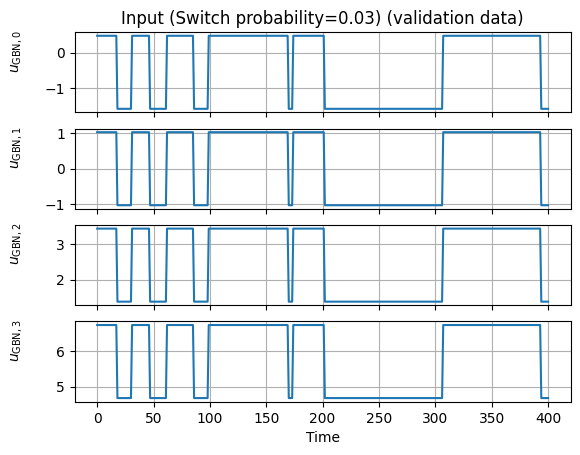

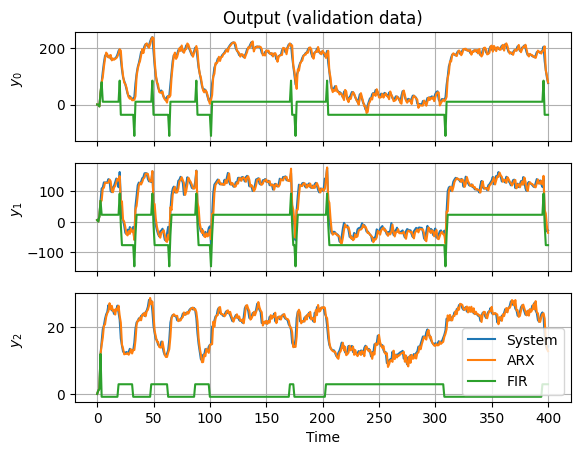

In [7]:
fig = plot_comparison(
    time,
    Usim,
    [r"$u_\mathrm{GBN, " + str(i) + "}$" for i in range(Usim.shape[1])],
    title="Input (Switch probability=0.03) (validation data)",
)

fig = plot_comparison(
    time,
    [Ytot, Yout_ARX, Yout_FIR],
    ylabels=[f"$y_{i}$" for i in range(3)],
    legend=["System", "ARX", "FIR"],
    title="Output (validation data)",
)
